<a href="https://colab.research.google.com/github/siddharth0517/Fashion-Item-Classifier-with-CNN/blob/main/Fashion_Item_Classifier_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Importing Dataset

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Plotting Dataset**

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

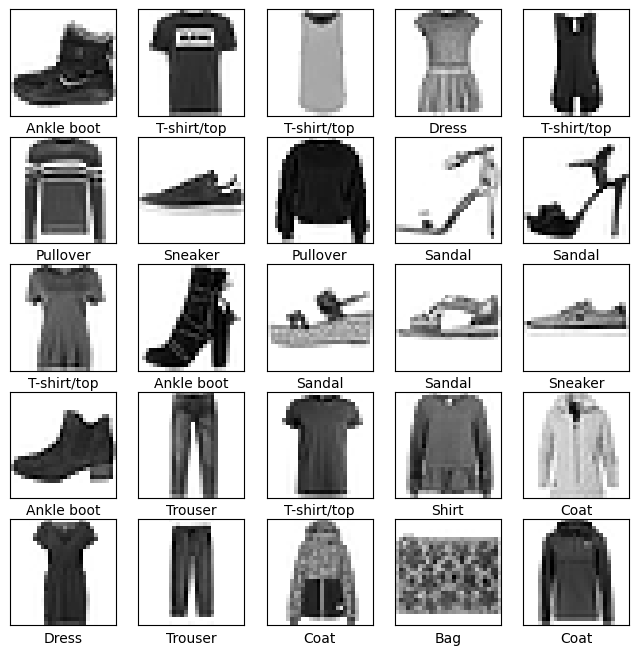

In [5]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

# Data Preprocessing

*Normalizing Data*

In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Building CNN Model

In [8]:
cnn = tf.keras.models.Sequential()

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[28, 28, 1]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [13]:
cnn.add(tf.keras.layers.Flatten())

In [14]:
from tensorflow.keras.regularizers import l2
cnn.add(tf.keras.layers.Dense(units=128, kernel_regularizer=l2(0.001),activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Compiling And Training

In [15]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = cnn.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6232 - loss: 1.0879 - val_accuracy: 0.8095 - val_loss: 0.5633
Epoch 2/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8134 - loss: 0.5582 - val_accuracy: 0.8486 - val_loss: 0.4540
Epoch 3/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8435 - loss: 0.4661 - val_accuracy: 0.8557 - val_loss: 0.4171
Epoch 4/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8600 - loss: 0.4211 - val_accuracy: 0.8728 - val_loss: 0.3831
Epoch 5/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8730 - loss: 0.3779 - val_accuracy: 0.8753 - val_loss: 0.3701
Epoch 6/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8812 - loss: 0.3545 - val_accuracy: 0.8756 - val_loss: 0.3654
Epoch 7/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8907 - loss: 0.3283 - val_accuracy: 0.8823 - val_loss: 0.3475
Epoch 8/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8928 - loss: 0.3160 - val_accuracy: 0

# Evaluation

In [18]:
test_loss, test_acc = cnn.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8962 - loss: 0.3840
Test accuracy: 0.90


**Accuracy VS Val_Accuracy**

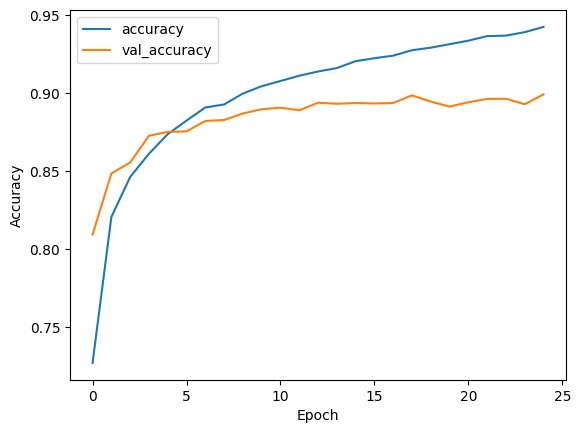

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
cnn.save('model.keras')